In [4]:
import datetime
import numpy as np
import matplotlib.pyplot as plt
import projectionAtR as prt

from scipy.optimize import curve_fit

In [6]:
date_start = datetime.date(2013, 9, 7)
date_end = datetime.date(2019, 10, 14)
R = 3

paramName = 'SymH'
paramN = 30
paramBins_b = np.linspace(-200,50,paramN+1)

fluxesName = 'fluxes1'
fluxesN = 40
fluxesBins_b = np.logspace(0, 6, fluxesN+1)
energyBins_N = np.array(range(5,21))

fluxMean_log, fluxStd_log = prt.fit_fluxes_gauss(R, date_start, date_end, paramName, paramBins_b, fluxesName, fluxesBins_b, energyBins_N)

<ErrorbarContainer object of 3 artists>

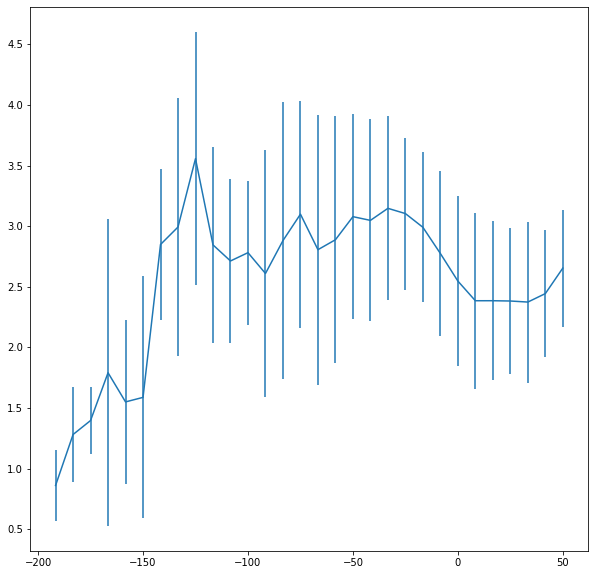

In [27]:
paramBins = paramBins_b[:-1] + np.diff(paramBins_b)
fig = plt.figure(figsize=[10,10])
ax = fig.add_subplot(111)

i = 4
ax.errorbar(paramBins, fluxMean_log[i,:], fluxStd_log[i,:])

In [17]:
paramBins.shape

(30,)

[[ 4.02820451e-04 -1.41204231e-08]
 [-1.41204231e-08  2.68574639e-04]]
[[ 1.65561002e-04 -2.96868242e-08]
 [-2.96868242e-08  1.10425267e-04]]
[[ 1.01095169e-03 -9.75270527e-08]
 [-9.75270527e-08  6.74143197e-04]]
[[ 3.97885397e-03 -9.20570860e-06]
 [-9.20570860e-06  2.66437336e-03]]
[[ 0.12904973 -0.01694047]
 [-0.01694047  0.0842148 ]]
[[ 3.03598193e-04 -3.95337694e-07]
 [-3.95337694e-07  2.02955655e-04]]
[[ 1.41820215e-03 -1.14376138e-05]
 [-1.14376138e-05  9.57170886e-04]]
[[ 0.03629218 -0.00235387]
 [-0.00235387  0.02505423]]
[[ 0.01754179 -0.00169973]
 [-0.00169973  0.01194304]]
[[ 2.15137743e-03 -5.27887262e-06]
 [-5.27887262e-06  1.44095454e-03]]
[[ 2.41520413e-03 -3.19761034e-05]
 [-3.19761034e-05  1.63892490e-03]]
[[ 1.10245971e-03 -9.23041782e-06]
 [-9.23041782e-06  7.44307580e-04]]
[[ 3.44070656e-03 -8.74801865e-05]
 [-8.74801865e-05  2.35632858e-03]]
[[ 0.00331748 -0.00010676]
 [-0.00010676  0.00227977]]
[[ 3.05571489e-03 -4.94404492e-05]
 [-4.94404492e-05  2.07878061e-03]]

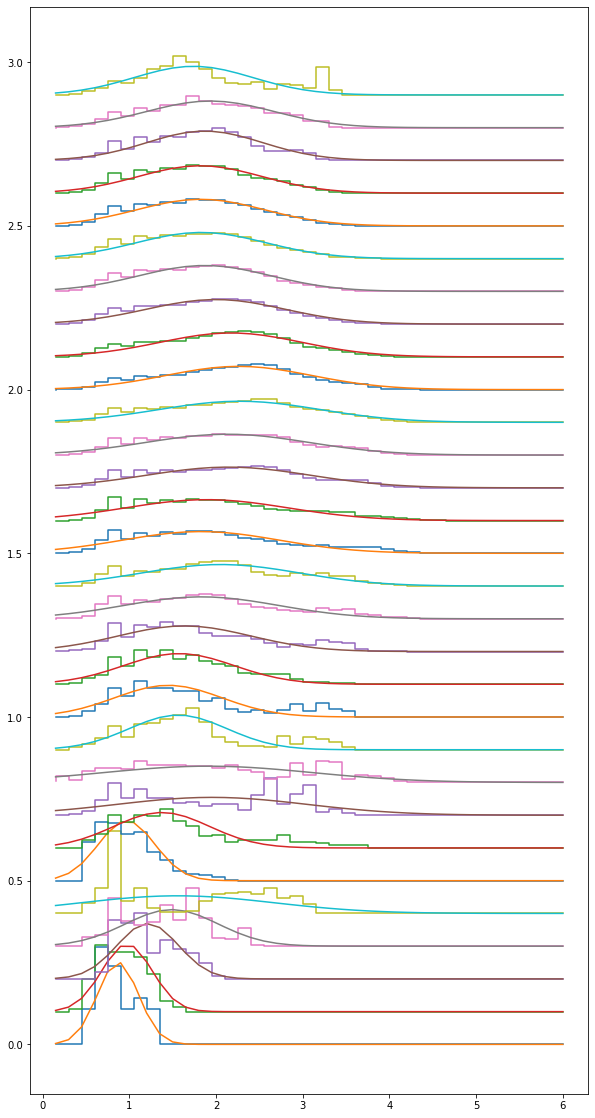

In [76]:
binsData = (binsN.T / np.sum(binsN,axis=1)).T

fig = plt.figure(figsize=[10,20])
ax = fig.add_subplot(111)

xs = np.log10(xBins[1:])
ys = np.ones_like(xs)
dx = np.mean(np.diff(xs))
f = lambda x, X, s: np.exp(-(x-X)**2 / (2*s*s)) / np.sqrt(2*np.pi*s*s) * dx

popt = np.zeros((binsData.shape[0],2))

for i in range(binsData.shape[0]):
    ax.step(xs, binsData[i,:]+0.1*i)
    p0 = [3, 1]
    popt[i,:], pcov = curve_fit(f, xs, binsData[i,:])
    print(pcov)
    ax.plot(xs, f(xs,*popt[i,:])+0.1*i)



In [73]:
range(binsData.shape[0])

range(0, 80)